In [16]:
# LAB3: Tensorflow Submission
import pandas as pd
import numpy as np
Xtrain = pd.read_csv('train-data.csv')
Ytrain = pd.read_csv('train-target.csv')
Xtest = pd.read_csv('test-data.csv')
Ytest = pd.read_csv('test-target.csv')

one_hot = pd.get_dummies(Ytrain['d'])
Ytrain = Ytrain.drop('d',axis = 1)
# Join the encoded df
Ytrain = Ytrain.join(one_hot)
#Ytrain

one_hot = pd.get_dummies(Ytest['g'])
Ytest = Ytest.drop('g',axis = 1)
# Join the encoded df
Ytest = Ytest.join(one_hot)
#Ytest
#Ytrain

Xtrain = Xtrain.values
Ytrain = Ytrain.values
Xtest = Xtest.values
Ytest = Ytest.values

#data = pd.DataFrame(Ytrain)
#data.columns = ['a', 'b','c', 'd','e', 'f','g', 'h','i', 'j','k', 'l','m', 'n','o', 'p','q', 'r','s', 't','u', 'v','w', 'x','y', 'z']


#Ytrain = data.idxmax(axis=1)
#Ytrain.to_csv("test-pred.txt", index = False)

#display(Ytrain)


<Figure size 432x288 with 0 Axes>

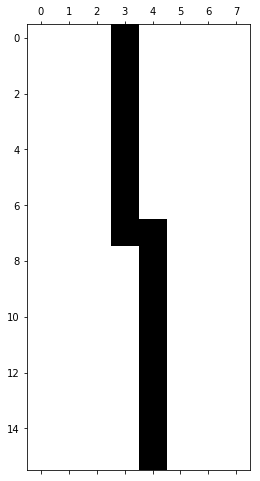

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=uint8)

In [17]:

%matplotlib inline
import matplotlib.pyplot as plt

x = Xtrain[0].reshape(16, 8)

plt.gray()
plt.matshow(1.0 - x) # 1.0 - x simply inverts the fading direction of the image
plt.savefig("i.png", dpi= 300)
plt.show()


Ytrain[0]

In [18]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 128])

In [19]:
W = tf.Variable(tf.zeros([128, 26]))
b = tf.Variable(tf.zeros([26]))
W

<tf.Variable 'Variable_2:0' shape=(128, 26) dtype=float32_ref>

In [20]:
y_hat = tf.nn.softmax(tf.matmul(x, W) + b)

In [21]:
y = tf.placeholder(tf.float32, [None, 26])

In [22]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_hat), reduction_indices=[1]))

In [23]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [24]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [25]:
import numpy as np

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

for _ in range(1000):
    batch_xs, batch_ys = next_batch(1000, Xtrain, Ytrain)
    sess.run(train_step, feed_dict = {x: batch_xs, y: batch_ys})

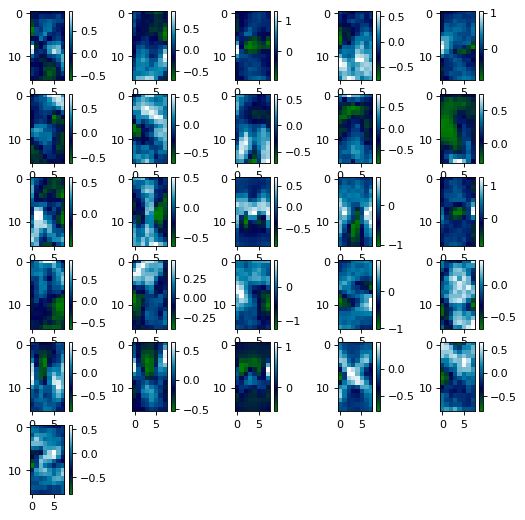

In [26]:
w = W.eval()
fig = plt.figure(figsize=(8, 8), dpi=80)
for letter in range(w.shape[1]):
    ax = fig.add_subplot(6,5,letter+1)
    ax.set_aspect('equal')
    plt.imshow(w.T[letter].reshape(16, 8), interpolation='nearest', cmap=plt.cm.ocean)
    plt.colorbar()
plt.savefig("first_train_viz.png", dpi= 300)
plt.show()


In [27]:
correct_prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y,1))

In [28]:
predicted_y = tf.argmax(y_hat, 1)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc, pred_y = sess.run([accuracy, predicted_y], feed_dict={x: Xtest, y: Ytest})
print(acc)


0.7456376


In [29]:
alpha = ['a', 'b','c', 'd','e', 'f','g', 'h','i', 'j','k', 'l','m', 'n','o', 'p','q', 'r','s', 't','u', 'v','w', 'x','y', 'z']
pred = []
#pred_y
for i in range(len(pred_y)):
    pred.append(alpha[pred_y[i]])
    
pred_data = pd.DataFrame(pred)
pred_data.to_csv("test-pred1.txt", index = False)

In [30]:
#### KFold cross validation
sess.close()
opts = [0.01, 0.2, 0.5, 0.8, 1, 1.5, 2.5]
accuracy_scores = []

for opt_val in opts:
    train_step2 = tf.train.GradientDescentOptimizer(opt_val).minimize(cross_entropy)
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for _ in range(1000):
        batch_xs, batch_ys = next_batch(1000, Xtrain, Ytrain)
        sess.run(train_step2, feed_dict = {x: batch_xs, y: batch_ys})
    
    correct_prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y,1))

    predicted_y = tf.argmax(y_hat, 1)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc, pred_y = sess.run([accuracy, predicted_y], feed_dict={x: Xtest, y: Ytest})
    accuracy_scores.append(acc)
    print("For Optimizer value : " , opt_val , " Accuracy is: " ,acc)
    sess.close()


best_index = np.array(accuracy_scores).argmax()
best_opt = opts[best_index]

train_step3 = tf.train.GradientDescentOptimizer(best_opt).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for _ in range(1000):
    batch_xs, batch_ys = next_batch(1000, Xtrain, Ytrain)
    sess.run(train_step3, feed_dict = {x: batch_xs, y: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y,1))

predicted_y = tf.argmax(y_hat, 1)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc, pred_y = sess.run([accuracy, predicted_y], feed_dict={x: Xtest, y: Ytest})

print("For Best Optimizer value : " , opt_val , " Accuracy is: " ,acc)




For Optimizer value :  0.01  Accuracy is:  0.4493768
For Optimizer value :  0.2  Accuracy is:  0.71294343
For Optimizer value :  0.5  Accuracy is:  0.74362415
For Optimizer value :  0.8  Accuracy is:  0.7543624
For Optimizer value :  1  Accuracy is:  0.7586769
For Optimizer value :  1.5  Accuracy is:  0.7645254
For Optimizer value :  2.5  Accuracy is:  0.767977
For Best Optimizer value :  2.5  Accuracy is:  0.7700863


In [31]:
pred = []

for i in range(len(pred_y)):
    pred.append(alpha[pred_y[i]])
    
pred_data = pd.DataFrame(pred)
pred_data.to_csv("test-pred2.txt", index = False)

In [32]:
######## Improving the model

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


In [33]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME', use_cudnn_on_gpu=False)

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')


In [34]:
W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

In [35]:
x_image = tf.reshape(x, [-1, 16, 8, 1])

In [36]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [37]:
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [38]:
W_fc1 = weight_variable([4* 2 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 4*2*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [39]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [40]:
W_fc2 = weight_variable([1024, 26])
b_fc2 = bias_variable([26])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
y_hat = tf.nn.softmax(y_conv)

In [41]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_hat), reduction_indices=[1]))

In [42]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [43]:
predicted_y = tf.argmax(y_hat, 1)
real_y = tf.argmax(y, 1)
correct_prediction = tf.equal(predicted_y, real_y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [44]:
sess.run(tf.global_variables_initializer())
for i in range(1000):
    batch_x, batch_y = next_batch(1000, Xtrain, Ytrain)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        print('step {}, training accuracy {}'.format(i, train_accuracy))
    train_step.run(feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
    
import numpy as np
accuracy_values = []
predicted_targets = []

for j in range(100):
    batch_x, batch_y = next_batch(100, Xtest, Ytest)
    b_acc, b_pred_y = sess.run([accuracy, predicted_y], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
    accuracy_values.append(b_acc)
    predicted_targets.extend(b_pred_y)
    
print('test accuracy {}'.format(np.mean(accuracy_values)))

step 0, training accuracy 0.032999999821186066
step 100, training accuracy 0.5360000133514404
step 200, training accuracy 0.6840000152587891
step 300, training accuracy 0.7590000033378601
step 400, training accuracy 0.7879999876022339
step 500, training accuracy 0.8349999785423279
step 600, training accuracy 0.8190000057220459
step 700, training accuracy 0.8429999947547913
step 800, training accuracy 0.8569999933242798
step 900, training accuracy 0.8880000114440918
test accuracy 0.8612000346183777


In [45]:
alpha = ['a', 'b','c', 'd','e', 'f','g', 'h','i', 'j','k', 'l','m', 'n','o', 'p','q', 'r','s', 't','u', 'v','w', 'x','y', 'z']


for i in range(len(predicted_targets)):
    predicted_targets[i]= alpha[predicted_targets[i]]
    
pred_data = pd.DataFrame(predicted_targets)
pred_data.to_csv("predicted_targets.txt", index = False)

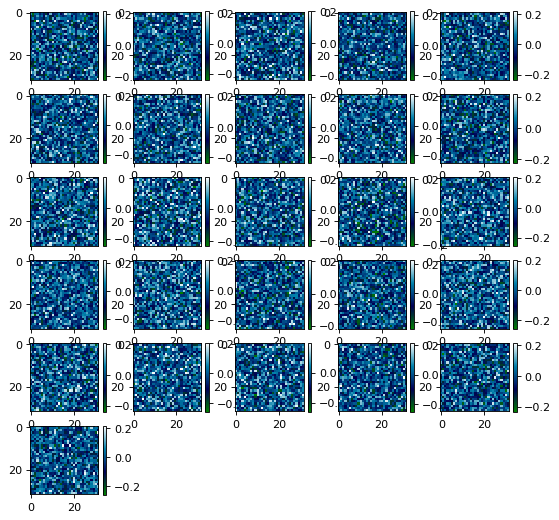

In [46]:
w = W_fc2.eval()
fig = plt.figure(figsize=(8, 8), dpi=80)
for letter in range(w.shape[1]):
    ax = fig.add_subplot(6,5,letter+1)
    ax.set_aspect('equal')
    plt.imshow(w.T[letter].reshape(32, 32), interpolation='nearest', cmap=plt.cm.ocean)
    plt.colorbar()
plt.savefig("last_train_viz.png", dpi= 300)
plt.show()
